In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating the full dataset

In [3]:
def assign_label(x):
    if x.length < 15:
        if (x.width < 10) & (x.width > 0) :
            if (x.height < 5) & (x.height > 0):
                return 'A'
            elif x.height >= 5:
                return 'B'
        else:
            return 'C'
    elif (x.height < 5) and (x.height > 0):
            return 'C'
    elif x.height >= 5:
        return 'B'
    else:
        pass

In [4]:
def create_dataset(sample_num):
    np.random.seed(42)
    df = pd.DataFrame(columns = ['length', 'width', 'height'])
    df['length'] = np.random.randint(1, 30, sample_num)
    df['width'] = np.random.randint(0, 15, sample_num)
    df['height'] = np.random.randint(0, 100, sample_num)
    df['label'] = df.apply(lambda row: assign_label(row), axis=1)
    return df

In [5]:
def save_dataset(df, filename):
    df.to_csv(f'data/{filename}', index=False)

In [8]:
df = create_dataset(10000)
df.head()

,length,width,height,label
0,7,6,55,B
1,20,12,16,B
2,29,1,75,B
3,15,5,88,B
4,11,8,55,B


In [9]:
df.label.value_counts()

B    7730
C    2078
A     109
Name: label, dtype: int64

In [11]:
df = df[df.label.notna()]
df.isna().sum()

length    0
width     0
height    0
label     0
dtype: int64

In [12]:
len(df)

9917

In [13]:
save_dataset(df, 'dataset_10000_missing.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

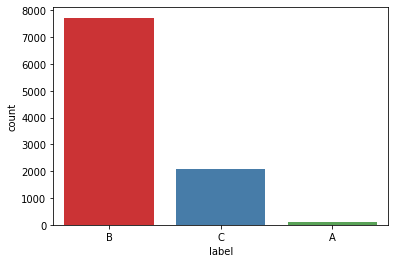

In [14]:
sns.countplot(x='label', data=df, palette = 'Set1')